In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import sweetviz as sv
import plotly.express as px
import plotly.graph_objects as go

from ydata_profiling import ProfileReport 

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas
dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('Jadarat_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
df.head()

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [6]:
df.tail()

job_title    job_date  \
1465  مهندس تقنية معلومات  19/06/1444   
1466               سكرتير  19/06/1444   
1467                صيدلي  18/06/1444   
1468  مشغل آلة تشطيب رخام  18/06/1444   
1469                صيدلي  18/06/1444   

                                               job_desc  \
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name     comp_no comp_type  \
1465                  مطعم الاوراق الخضر لتقديم الوجبات  15-1698448       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال   9-2013930       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...  15-1971895       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   

        comp_size                  eco_activity  \
1465  صغيرة فئة ب             المطاعم مع الخدمة   
1466  صغيرة فئة ب  أنشطة حاضنات ومسرعات الأعمال   
1467  صغيرة فئة ب                           NaN   
1468  صغيرة فئة أ                           NaN   
1469  صغيرة فئة ب                           NaN   

                                                 qualif           region  \
1465                                                NaN           الرياض   
1466  ['Skill data', 'فن التواصل', 'محترف', 'Languag...      مكة المكرمة   
1467  ['Professional certificate \\ License data', '...           الرياض   
1468  ['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...  المنطقة الشرقية   
1469  ['Professional certificate \\ License data', '...           الرياض   

              city                                           benefits  \
1465  AR RIYADH...                               ['Salary', '5500.0']   
1466     JEDDAH...                               ['Salary', '4000.0']   
1467  AR RIYADH...                               ['Salary', '7000.0']   
1468  AL KHUBAR...  ['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...   
1469  AR RIYADH...                               ['Salary', '7000.0']   

       contract positions     job_post_id    exper gender  
1465  دوام كامل     0 / 1  20202026400353  0 Years   both  
1466  دوام كامل     0 / 1  20202026399849  2 Years   both  
1467  دوام كامل     0 / 1  20202026399061  0 Years   both  
1468  دوام كامل     0 / 3  20202026398972  0 Years      M  
1469  دوام كامل     0 / 1  20202026399061  0 Years   both

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [8]:
df.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [9]:
df.describe()

job_post_id
count  1.470000e+03
mean   2.020203e+13
std    5.863941e+04
min    2.020203e+13
25%    2.020203e+13
50%    2.020203e+13
75%    2.020203e+13
max    2.020203e+13

In [10]:
df.describe(include="object")

job_title    job_date  \
count       1470        1470   
unique       324          92   
top         بائع  09/06/1444   
freq          98          47   

                                                 job_desc  \
count                                                1470   
unique                                                438   
top     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
freq                                                   93   

                                                job_tasks  \
count                                                1470   
unique                                                444   
top     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
freq                                                   90   

                                                comp_name   comp_no comp_type  \
count                                                1470      1470      1470   
unique                                                886       894         2   
top     شركه العرض المتقن للخدمات التجارية شركة مساهمة...  1-169123       خاص   
freq                                                   16        16      1465   

          comp_size       eco_activity  \
count          1456               1380   
unique            7                361   
top     صغيرة فئة ب  المطاعم مع الخدمة   
freq            635                 65   

                                          qualif  region          city  \
count                                        780    1470          1470   
unique                                       615      14           114   
top     ['Language data', 'الانجليزية', 'متوسط']  الرياض  AR RIYADH...   
freq                                          28     622           523   

                    benefits   contract positions    exper gender  
count                   1470       1470      1470     1470   1470  
unique                   393          2        25        6      3  
top     ['Salary', '4000.0']  دوام كامل     0 / 1  0 Years   both  
freq                     449       1448       853      833    587

## Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting
statistics and information about that data. 

In [12]:
profile = ProfileReport(df, title="Jadarat data")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and
reliable.

#### Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are 
empty.

In [15]:
df.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

## Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



In [17]:
# Change Values From String List To List Or Return List With Message

In [18]:
df.rename(columns={'exper': 'exper_year'}, inplace=True)

In [19]:
def stringToList(element):
    if pd.isna(element):
        return ['لا توجد معلومات']
    else:
        return eval(element)

In [20]:
df['job_desc'] = df['job_desc'].apply(stringToList)

In [21]:
df['job_tasks'] = df['job_tasks'].apply(stringToList)

In [22]:
df['qualif'] = df['qualif'].apply(stringToList)

In [23]:
df['benefits'] = df['benefits'].apply(stringToList)

In [24]:
# I Do Not Have Time, I Do Not Have Knowledge

In [25]:
df = df.drop( df[df['eco_activity'].isnull()].index.tolist() )

In [26]:
df = df.drop( df[df['comp_size'].isnull()].index.tolist() )

In [27]:
df['salary'] = df['benefits'].apply(lambda x : x[1])

In [28]:
df = df.astype({"salary": float})

In [29]:
df['exper_year'].replace(' Years', '', regex = True, inplace=True)

In [30]:
df['exper_year'] = df['exper_year'].astype(int)

## Graphical Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

## Answer Quastions: 

What proportion of job postings is attributed to each region within the
kingdom?

In [34]:
Q1 = df.groupby(by = 'region').size().sort_values(ascending = False)

In [35]:
D1 = { 'region' : [] , 'count' : [] }
df_Q1 = pd.DataFrame({ 'region' : Q1.index, 'count' : Q1.values })

In [36]:
df_Q1

region  count
0            الرياض    580
1       مكة المكرمة    347
2   المنطقة الشرقية    205
3   المدينة المنورة     80
4            الباحة     46
5              عسير     39
6            القصيم     31
7              حائل     17
8              تبوك     11
9             نجران      7
10            جازان      6
11            الجوف      5
12  الحدود الشمالية      4
13             اخرى      1

In [37]:
Q2 = df.groupby(by = 'gender').size().sort_values(ascending = False)
D2 = { 'gender' : [] , 'count' : [] }
df_Q2 = pd.DataFrame({ 'gender' : Q2.index, 'count' : Q2.values })

In [38]:
df_Q2['gender'] = ['كلاهما  ', ' رجال ', 'نساء']
df_Q2

gender  count
0  كلاهما      548
1     رجال     451
2      نساء    380

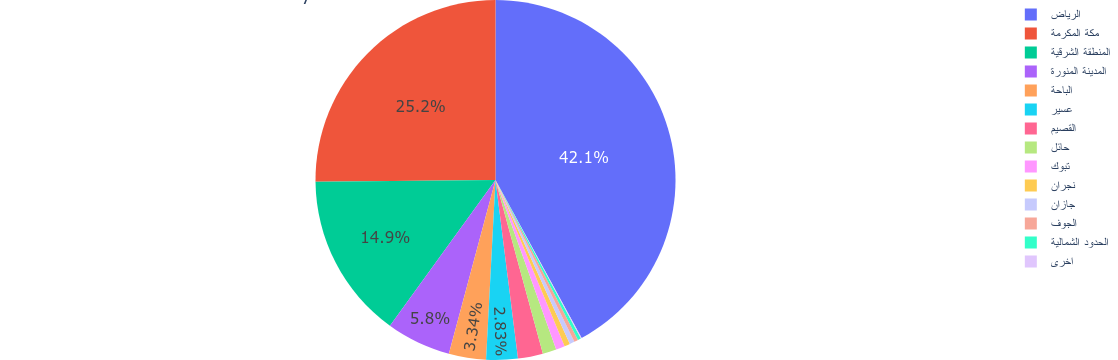

In [39]:
char = px.pie(df_Q1, values='count', names='region', title='Number Of Jobs For Each City In Saudi Arabia')
char.update_traces(textposition='inside')
char.update_layout(uniformtext_minsize=15, margin=dict(t=0, b=0, l=0, r=0), uniformtext_mode='hide')
char.show()

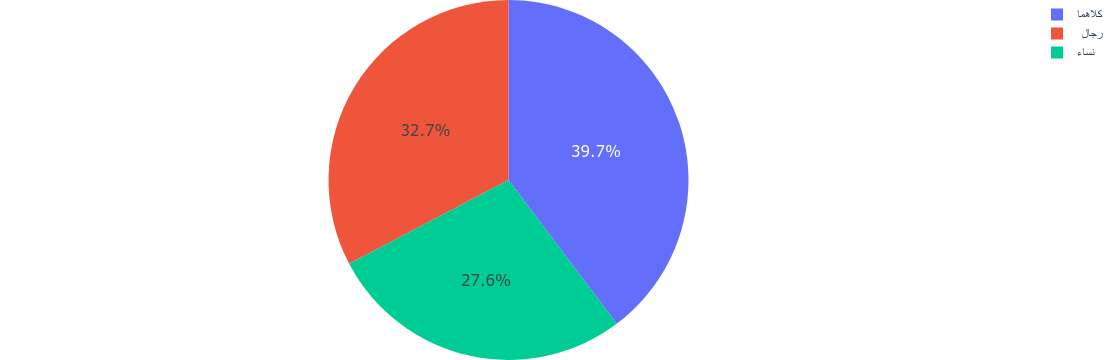

In [41]:
char = px.pie(df_Q2, values='count', names='gender')
char.update_traces(textposition='inside')
char.update_layout(uniformtext_minsize=15, margin=dict(t=0, b=0, l=0, r=0), uniformtext_mode='hide')
char.show()

In [43]:
Q3 = df[df['exper_year'] == 0]
Q3['salary'].min(), Q3['salary'].max()

(3000.0, 12325.0)

In [45]:
Q4 = df.groupby('exper_year').size().sort_values(ascending = False)
df_Q4 = pd.DataFrame({ 'year' : Q4.index, 'count' : Q4.values })
df_Q4

year  count
0     0    776
1     2    413
2     4    146
3     7     27
4    10     14
5    12      3

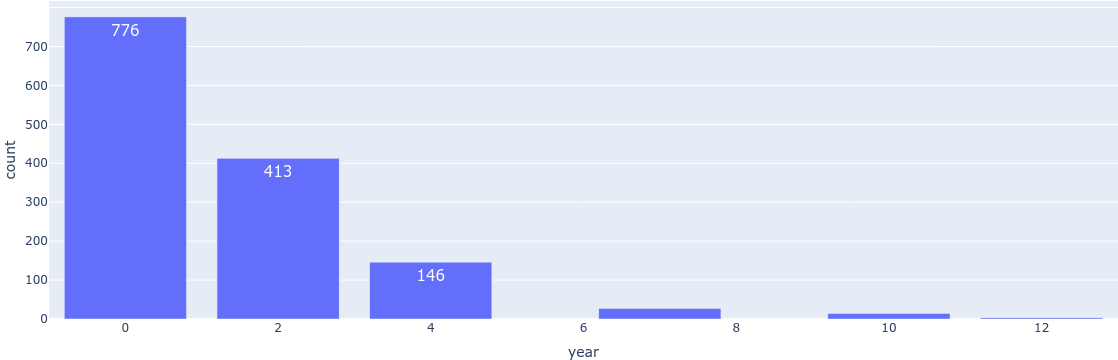

In [47]:
char = px.bar(data_frame = df_Q4, x = 'year', y = 'count')
char.update_traces(textposition='inside', texttemplate=list(df_Q4['count']))
char.update_layout(uniformtext_minsize=15, margin=dict(t=0, b=0, l=0, r=0), uniformtext_mode='hide')
char.show()